Carga de los Archivos como Dataframe

In [1]:
import pandas as pd

bookings = 'Bookings.csv'
df_bookings = pd.read_csv(bookings, delimiter=',')

properties = 'Properties.csv'
df_properties= pd.read_csv(properties, delimiter=',')

## PROPERTIES

In [2]:
num_filas_properties = df_properties.shape[0]
num_filas_properties

344

In [4]:
df_properties.head()

,PropertyId,RealProperty,Capacity,Square,PropertyType,NumBedrooms,ReadyDate
0,43630,Yes,7,141,Apartment,3,2024-09-25 00:00:00
1,43622,Yes,4,70,Apartment,2,2024-08-12 00:00:00
2,43620,Yes,2,55,Apartment,1,2024-08-04 00:00:00
3,43616,No,4,60,Apartment,2,2024-07-05 00:00:00
4,43606,Yes,4,60,Apartment,2,2024-06-27 00:00:00


In [5]:
df_properties.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyId,344.0,40120.491279,10300.292422,2883.0,43052.75,43231.5,43445.0,43630.0
Capacity,344.0,4.811047,2.138579,1.0,4.00,4.0,6.0,12.0
Square,344.0,70.255814,41.473497,0.0,50.00,66.0,80.0,523.0
NumBedrooms,344.0,2.133721,1.157872,0.0,1.00,2.0,3.0,5.0



**Estandarizacion**

Se tiene que cambiar Apa por Apartment

In [6]:
conteo_combinado_properties = df_properties.groupby(['RealProperty', 'PropertyType']).size().reset_index(name='Frecuencia')
conteo_combinado_properties

,RealProperty,PropertyType,Frecuencia
0,No,Apa,1
1,No,Apartment,12
2,No,House,1
3,Yes,Apa,82
4,Yes,Apartment,213
5,Yes,House,1


In [7]:
df_properties['PropertyType'] = df_properties['PropertyType'].replace('Apa', 'Apartment')
conteo_combinado_properties = df_properties.groupby(['RealProperty', 'PropertyType']).size().reset_index(name='Frecuencia')
conteo_combinado_properties

,RealProperty,PropertyType,Frecuencia
0,No,Apartment,13
1,No,House,1
2,Yes,Apartment,295
3,Yes,House,1


Se ve que faltan datos de Property Type en Properties, no se retiran filas.

In [8]:
df_properties.isnull().sum()

,0
PropertyId,0
RealProperty,0
Capacity,0
Square,0
PropertyType,34
NumBedrooms,0
ReadyDate,0


## BOOKINGS

In [9]:
num_filas_bookings = df_bookings.shape[0]
num_filas_bookings

79595

In [10]:
df_bookings.head()

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
0,43469,155168,2024-10-03 16:42:13,2024-10-09 00:00:00,2024-10-12 00:00:00,2,0,0,2,3,Airbnb,391.03,0.00,391.03,130.34,3.96,394.99
1,43025,155167,03/10/2024,2025-02-02 00:00:00,2025-02-07 00:00:00,3,0,0,3,5,Booking.com,1692.00,101.13,1793.13,358.63,15.00,1808.13
2,43404,155166,03/10/2024,2024-11-18 00:00:00,2024-11-25 00:00:00,3,0,0,3,7,Airbnb,827.17,0.00,827.17,118.17,144.38,971.55
3,43276,155165,2024-10-03 15:55:39,2024-11-14 00:00:00,2024-11-18 00:00:00,5,0,0,5,4,Airbnb,692.86,0.00,692.86,173.22,137.50,830.36
4,4138,155164,2024-10-03 15:53:02,2024-11-20 00:00:00,2024-12-06 00:00:00,5,0,0,5,16,Airbnb,2005.43,0.00,2005.43,125.34,240.63,2246.06


In [11]:
df_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyId,79595.0,32905.939092,16619.359274,2883.00,12688.00,43038.00,43187.000,43630.00
Property_BookingId,79595.0,109414.660016,27978.782124,48745.00,87699.50,111050.00,133282.500,155168.00
Adults,79595.0,3.596934,1.761671,0.00,2.00,3.00,4.000,12.00
Children,79595.0,0.416044,0.885849,0.00,0.00,0.00,0.000,9.00
Infants,79595.0,0.028595,0.180560,0.00,0.00,0.00,0.000,4.00
Persons,79595.0,4.041573,1.831116,0.00,3.00,4.00,5.000,15.00
NumNights,79595.0,5.378566,10.859763,-29.00,3.00,4.00,6.000,925.00
RoomRate,71635.0,953.378157,839.469840,-179.90,470.70,756.00,1198.800,32300.00
CleaningFee,79595.0,56.516353,51.905713,0.00,0.00,66.55,96.050,327.00
Revenue,71635.0,1009.920357,852.887444,0.00,516.35,811.30,1266.785,32300.00


In [12]:
df_bookings.isnull().sum()

,0
PropertyId,0
Property_BookingId,0
BookingCreatedDate,0
ArrivalDate,0
DepartureDate,0
Adults,0
Children,0
Infants,0
Persons,0
NumNights,0


Se retiraran las filas sin datos de la columna Channel. Esta al parecer indica el medio/origen de los datos de esa filas.

Se retiraran las filas sin datos de la columna Revenue

In [13]:
df_bookings = df_bookings.dropna(subset=['Channel'])
df_bookings = df_bookings.dropna(subset=['Revenue'])

In [14]:
df_bookings.isnull().sum()

,0
PropertyId,0
Property_BookingId,0
BookingCreatedDate,0
ArrivalDate,0
DepartureDate,0
Adults,0
Children,0
Infants,0
Persons,0
NumNights,0


In [16]:
num_filas_bookings = df_bookings.shape[0]
num_filas_bookings

71241

In [17]:
conteo_combinado_bookings = df_bookings["Channel"].value_counts()
conteo_combinado_bookings

,count
Channel,
Airbnb,43735
Booking.com,21379
Stay U-nique.com Website,1792
Vrbo,1122
Manual,877
Expedia Collects,838
Marriott Homes & Villas,394
RentTheSun,227
HomeToGo,186


Se retiran filas

## Formato de Fechas

En el Dataframe df_bookings los campos fecha tienen este formato

 03/10/2024

 se estandarizara en

 2024-10-03

In [18]:
df_bookings['BookingCreatedDate'] = df_bookings['BookingCreatedDate'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S', errors='coerce')
    if '-' in str(x) else pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
)

In [19]:
df_bookings

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
0,43469,155168,2024-10-03 16:42:13,2024-10-09 00:00:00,2024-10-12 00:00:00,2,0,0,2,3,Airbnb,391.03,0.00,391.03,130.340000,3.96,394.99
1,43025,155167,2024-10-03 00:00:00,2025-02-02 00:00:00,2025-02-07 00:00:00,3,0,0,3,5,Booking.com,1692.00,101.13,1793.13,358.630000,15.00,1808.13
2,43404,155166,2024-10-03 00:00:00,2024-11-18 00:00:00,2024-11-25 00:00:00,3,0,0,3,7,Airbnb,827.17,0.00,827.17,118.170000,144.38,971.55
3,43276,155165,2024-10-03 15:55:39,2024-11-14 00:00:00,2024-11-18 00:00:00,5,0,0,5,4,Airbnb,692.86,0.00,692.86,173.220000,137.50,830.36
4,4138,155164,2024-10-03 15:53:02,2024-11-20 00:00:00,2024-12-06 00:00:00,5,0,0,5,16,Airbnb,2005.43,0.00,2005.43,125.340000,240.63,2246.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79590,2883,48909,2012-01-16 22:09:11,2012-05-25 00:00:00,2012-05-28 11:00:00,6,0,0,6,3,RentTheSun,778.39,0.00,778.39,259.463333,NaN,0.00
79591,2883,48887,2012-01-12 00:00:00,2012-02-04 00:00:00,2012-02-08 11:00:00,4,0,1,5,3,RentTheSun,576.21,0.00,576.21,144.052500,NaN,0.00
79592,2883,48865,2012-01-08 17:05:53,2012-04-06 00:00:00,2012-04-13 11:00:00,6,0,0,6,7,RentTheSun,1461.76,0.00,1461.76,208.822857,NaN,0.00
79593,2883,48819,2011-12-22 18:18:12,2011-12-28 00:00:00,2012-01-06 11:00:00,2,0,0,2,9,RentTheSun,1000.00,0.00,1000.00,111.111111,NaN,0.00


In [20]:
df_properties['ReadyDate'] = pd.to_datetime(df_properties['ReadyDate'], errors='coerce')
df_bookings['ArrivalDate'] = pd.to_datetime(df_bookings['ArrivalDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_bookings['DepartureDate'] = pd.to_datetime(df_bookings['DepartureDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_bookings

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid
0,43469,155168,2024-10-03 16:42:13,2024-10-09,2024-10-12 00:00:00,2,0,0,2,3,Airbnb,391.03,0.00,391.03,130.340000,3.96,394.99
1,43025,155167,2024-10-03 00:00:00,2025-02-02,2025-02-07 00:00:00,3,0,0,3,5,Booking.com,1692.00,101.13,1793.13,358.630000,15.00,1808.13
2,43404,155166,2024-10-03 00:00:00,2024-11-18,2024-11-25 00:00:00,3,0,0,3,7,Airbnb,827.17,0.00,827.17,118.170000,144.38,971.55
3,43276,155165,2024-10-03 15:55:39,2024-11-14,2024-11-18 00:00:00,5,0,0,5,4,Airbnb,692.86,0.00,692.86,173.220000,137.50,830.36
4,4138,155164,2024-10-03 15:53:02,2024-11-20,2024-12-06 00:00:00,5,0,0,5,16,Airbnb,2005.43,0.00,2005.43,125.340000,240.63,2246.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79590,2883,48909,2012-01-16 22:09:11,2012-05-25,2012-05-28 11:00:00,6,0,0,6,3,RentTheSun,778.39,0.00,778.39,259.463333,NaN,0.00
79591,2883,48887,2012-01-12 00:00:00,2012-02-04,2012-02-08 11:00:00,4,0,1,5,3,RentTheSun,576.21,0.00,576.21,144.052500,NaN,0.00
79592,2883,48865,2012-01-08 17:05:53,2012-04-06,2012-04-13 11:00:00,6,0,0,6,7,RentTheSun,1461.76,0.00,1461.76,208.822857,NaN,0.00
79593,2883,48819,2011-12-22 18:18:12,2011-12-28,2012-01-06 11:00:00,2,0,0,2,9,RentTheSun,1000.00,0.00,1000.00,111.111111,NaN,0.00


Adicion de columna de # de dias de estancia

In [21]:
df_bookings['Num_dias'] = (df_bookings['DepartureDate'] - df_bookings['ArrivalDate']).dt.days
df_bookings

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,Channel,RoomRate,CleaningFee,Revenue,ADR,TouristTax,TotalPaid,Num_dias
0,43469,155168,2024-10-03 16:42:13,2024-10-09,2024-10-12 00:00:00,2,0,0,2,3,Airbnb,391.03,0.00,391.03,130.340000,3.96,394.99,3
1,43025,155167,2024-10-03 00:00:00,2025-02-02,2025-02-07 00:00:00,3,0,0,3,5,Booking.com,1692.00,101.13,1793.13,358.630000,15.00,1808.13,5
2,43404,155166,2024-10-03 00:00:00,2024-11-18,2024-11-25 00:00:00,3,0,0,3,7,Airbnb,827.17,0.00,827.17,118.170000,144.38,971.55,7
3,43276,155165,2024-10-03 15:55:39,2024-11-14,2024-11-18 00:00:00,5,0,0,5,4,Airbnb,692.86,0.00,692.86,173.220000,137.50,830.36,4
4,4138,155164,2024-10-03 15:53:02,2024-11-20,2024-12-06 00:00:00,5,0,0,5,16,Airbnb,2005.43,0.00,2005.43,125.340000,240.63,2246.06,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79590,2883,48909,2012-01-16 22:09:11,2012-05-25,2012-05-28 11:00:00,6,0,0,6,3,RentTheSun,778.39,0.00,778.39,259.463333,NaN,0.00,3
79591,2883,48887,2012-01-12 00:00:00,2012-02-04,2012-02-08 11:00:00,4,0,1,5,3,RentTheSun,576.21,0.00,576.21,144.052500,NaN,0.00,4
79592,2883,48865,2012-01-08 17:05:53,2012-04-06,2012-04-13 11:00:00,6,0,0,6,7,RentTheSun,1461.76,0.00,1461.76,208.822857,NaN,0.00,7
79593,2883,48819,2011-12-22 18:18:12,2011-12-28,2012-01-06 11:00:00,2,0,0,2,9,RentTheSun,1000.00,0.00,1000.00,111.111111,NaN,0.00,9


In [22]:
num_filas_df_bookings = df_bookings.shape[0]
num_filas_df_bookings

71241

In [23]:
num_filas_df_properties = df_properties.shape[0]
num_filas_df_properties

344

In [24]:
merged_df = pd.merge(df_bookings,df_properties,on='PropertyId', how='left')
merged_df.head()

,PropertyId,Property_BookingId,BookingCreatedDate,ArrivalDate,DepartureDate,Adults,Children,Infants,Persons,NumNights,...,ADR,TouristTax,TotalPaid,Num_dias,RealProperty,Capacity,Square,PropertyType,NumBedrooms,ReadyDate
0,43469,155168,2024-10-03 16:42:13,2024-10-09,2024-10-12,2,0,0,2,3,...,130.34,3.96,394.99,3,Yes,2.0,31.0,Apartment,0.0,2024-02-23
1,43025,155167,2024-10-03 00:00:00,2025-02-02,2025-02-07,3,0,0,3,5,...,358.63,15.00,1808.13,5,Yes,4.0,60.0,Apartment,2.0,2019-05-04
2,43404,155166,2024-10-03 00:00:00,2024-11-18,2024-11-25,3,0,0,3,7,...,118.17,144.38,971.55,7,Yes,5.0,45.0,NaN,2.0,2023-03-22
3,43276,155165,2024-10-03 15:55:39,2024-11-14,2024-11-18,5,0,0,5,4,...,173.22,137.50,830.36,4,Yes,5.0,64.0,Apartment,4.0,2022-02-15
4,4138,155164,2024-10-03 15:53:02,2024-11-20,2024-12-06,5,0,0,5,16,...,125.34,240.63,2246.06,16,Yes,5.0,60.0,Apartment,2.0,2013-08-07


In [25]:
num_filas_merged_df = merged_df.shape[0]
num_filas_merged_df

77996

In [26]:
duplicados = merged_df.duplicated().sum()
duplicados

0

In [27]:

merged_df.isnull().sum()

,0
PropertyId,0
Property_BookingId,0
BookingCreatedDate,0
ArrivalDate,0
DepartureDate,0
Adults,0
Children,0
Infants,0
Persons,0
NumNights,0


In [28]:
merged_df.to_csv('merged_properties_bookings.csv', index=False)

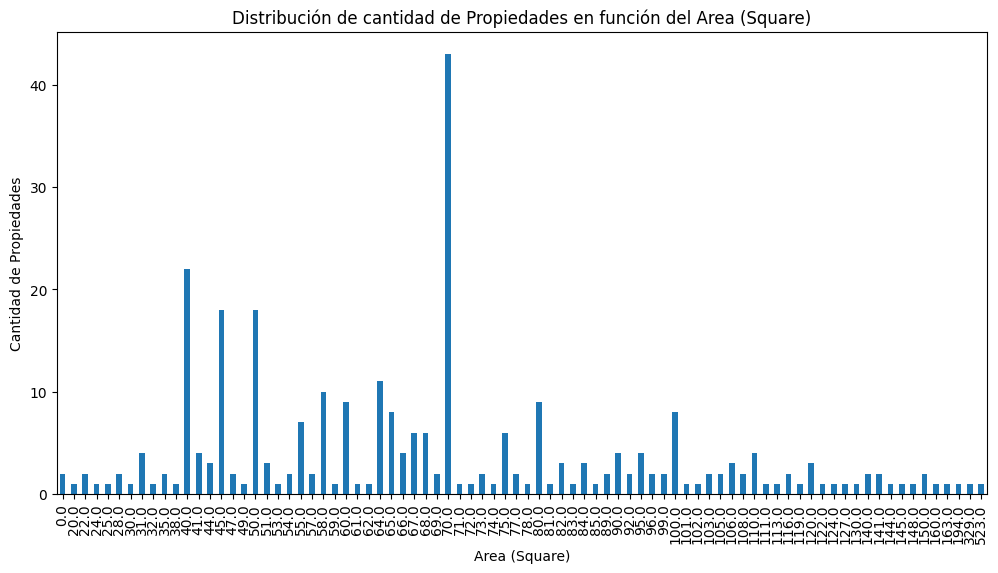

In [29]:
import matplotlib.pyplot as plt

conteoSquare = merged_df.groupby('Square')['PropertyId'].nunique()

plt.figure(figsize=(12, 6))
conteoSquare.plot(kind='bar')

plt.xlabel('Area (Square)')
plt.ylabel('Cantidad de Propiedades')
plt.title('Distribución de cantidad de Propiedades en función del Area (Square)')

plt.show()

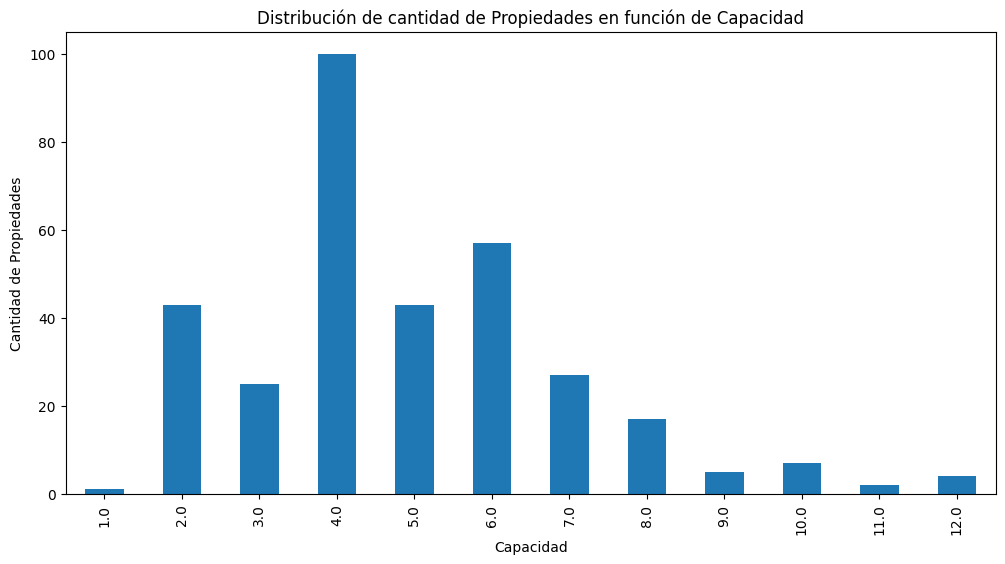

In [31]:
import matplotlib.pyplot as plt

conteoCapacidad = merged_df.groupby('Capacity')['PropertyId'].nunique()

plt.figure(figsize=(12, 6))
conteoCapacidad.plot(kind='bar')

plt.xlabel('Capacidad')
plt.ylabel('Cantidad de Propiedades')
plt.title('Distribución de cantidad de Propiedades en función de Capacidad')

plt.show()

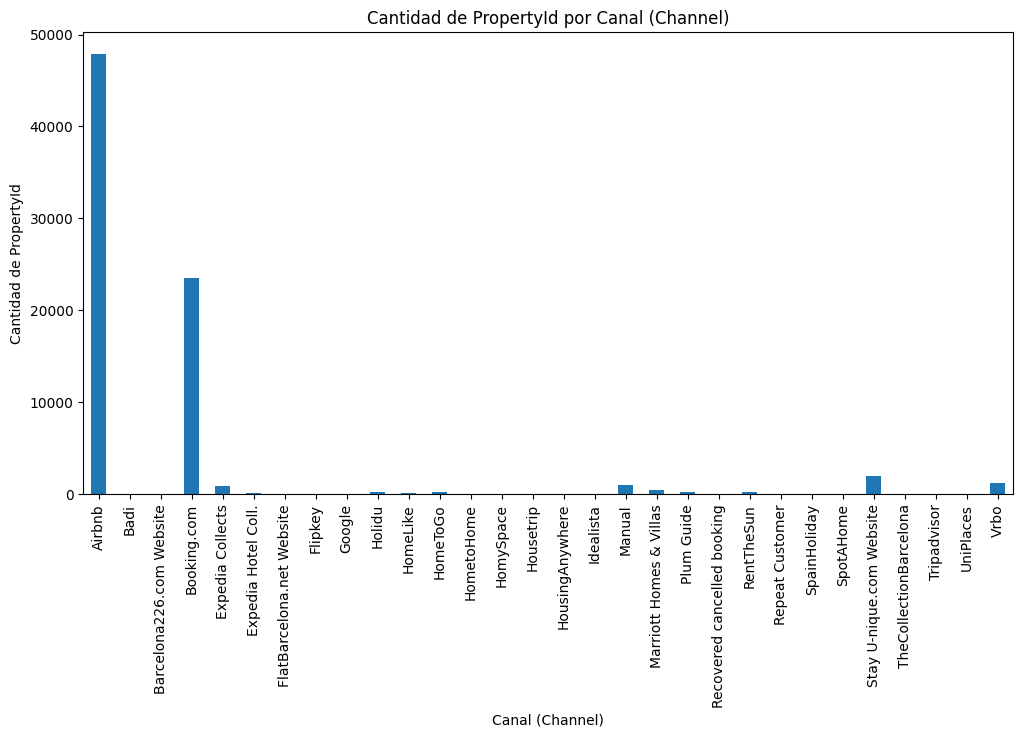

In [32]:
import matplotlib.pyplot as plt

cantidadChannel = merged_df.groupby('Channel')['PropertyId'].count()

plt.figure(figsize=(12, 6))
cantidadChannel.plot(kind='bar')

plt.xlabel('Canal (Channel)')
plt.ylabel('Cantidad de PropertyId')
plt.title('Cantidad de PropertyId por Canal (Channel)')

plt.show()

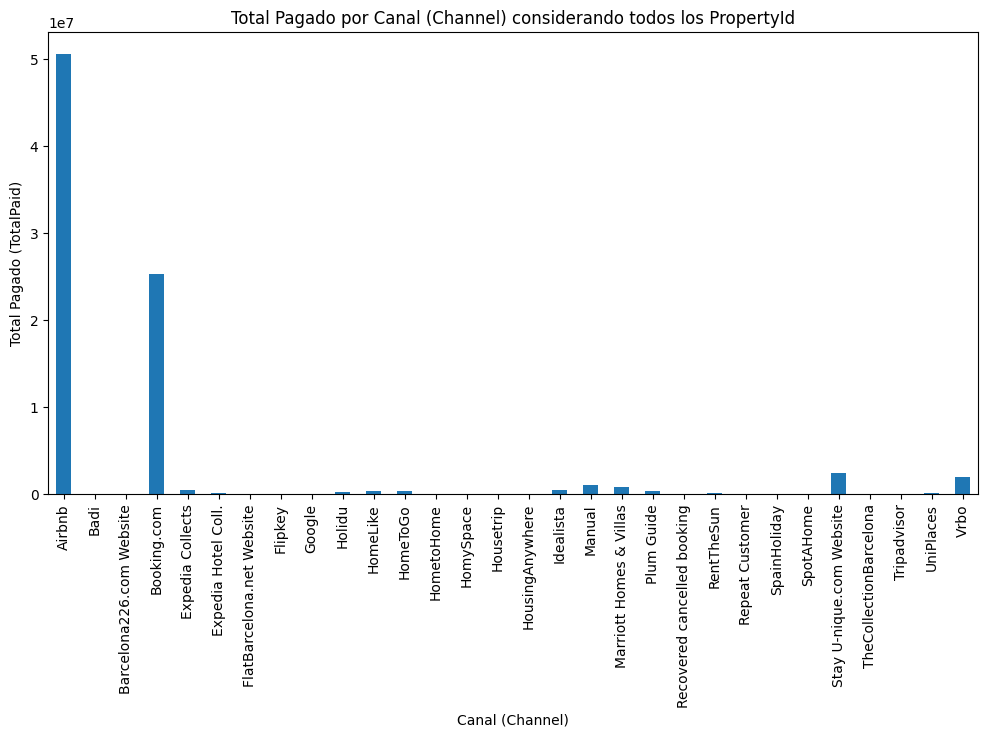

In [34]:
import matplotlib.pyplot as plt

totalPaidPerChannel = merged_df.groupby('Channel')['TotalPaid'].sum()

plt.figure(figsize=(12, 6))
totalPaidPerChannel.plot(kind='bar')

plt.xlabel('Canal (Channel)')
plt.ylabel('Total Pagado (TotalPaid)')
plt.title('Total Pagado por Canal (Channel) considerando todos los PropertyId')

plt.show()

<Figure size 1200x600 with 0 Axes>

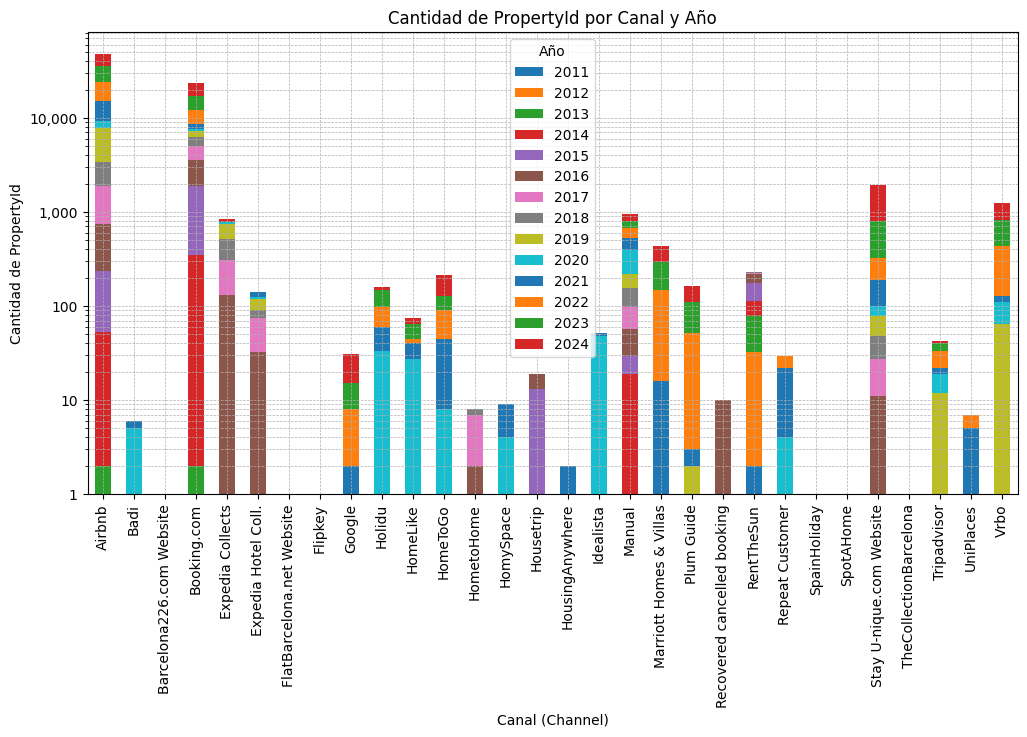

In [56]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

merged_df['Year'] = merged_df['BookingCreatedDate'].dt.year
cantidad_por_channel_anio = merged_df.groupby(['Channel', 'Year'])['PropertyId'].count().unstack()

plt.figure(figsize=(12, 6))
ax = cantidad_por_channel_anio.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.yscale('log')

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xlabel('Canal (Channel)')
plt.ylabel('Cantidad de PropertyId')
plt.title('Cantidad de PropertyId por Canal y Año')
plt.legend(title='Año')

plt.show()

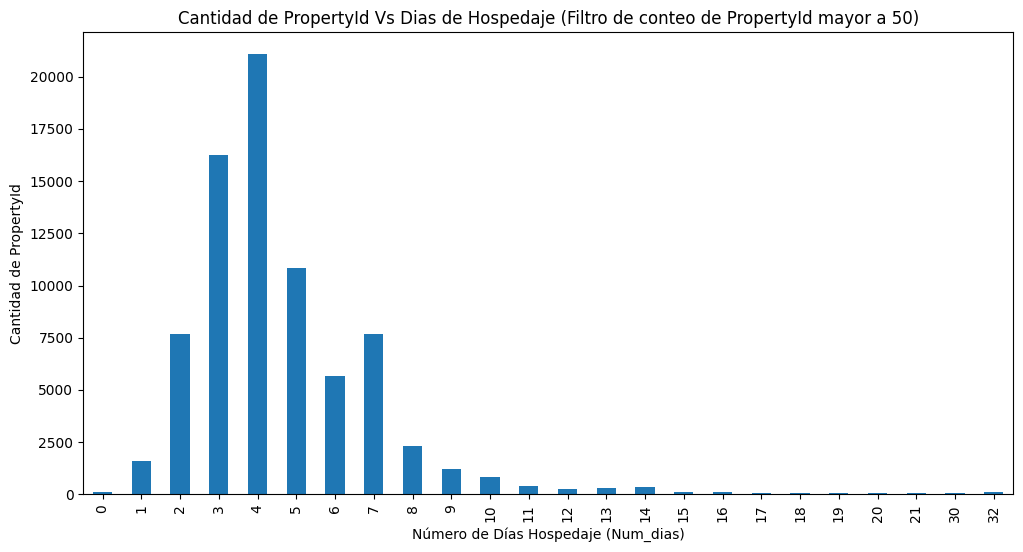

In [65]:
import matplotlib.pyplot as plt

conteo_por_dias = merged_df.groupby('Num_dias')['PropertyId'].count()

# Filtro para incluir solo los valores donde el conteo de PropertyId es mayor a 50
conteo_por_dias_mayor_50 = conteo_por_dias[conteo_por_dias > 50]

plt.figure(figsize=(12, 6))
conteo_por_dias_mayor_50.plot(kind='bar')

plt.xlabel('Número de Días Hospedaje (Num_dias)')
plt.ylabel('Cantidad de PropertyId')
plt.title('Cantidad de PropertyId Vs Dias de Hospedaje (Filtro de conteo de PropertyId mayor a 50)')

plt.show()

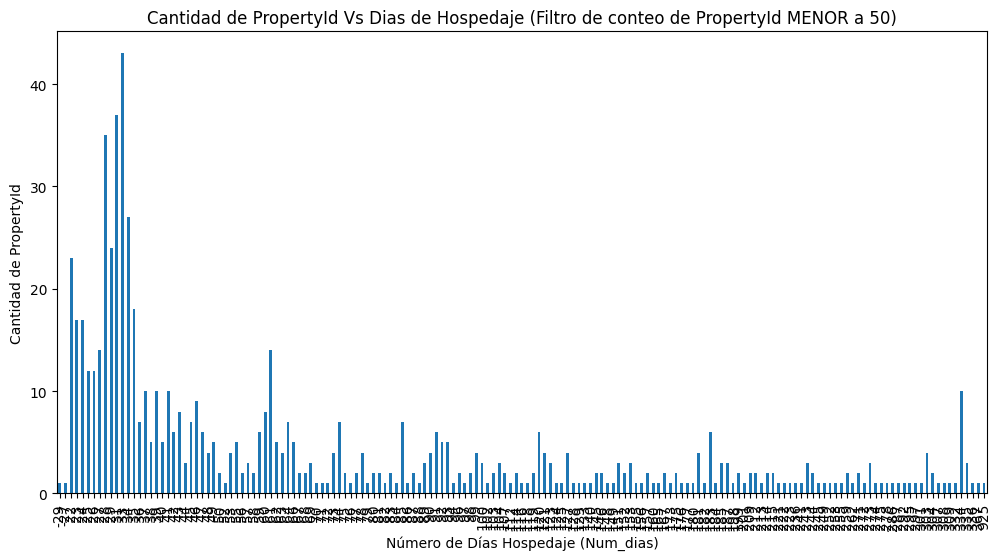

In [64]:
import matplotlib.pyplot as plt

conteo_por_dias = merged_df.groupby('Num_dias')['PropertyId'].count()

# Filtro para incluir solo los valores donde el conteo de PropertyId es menor a 50
conteo_por_dias_mayor_50 = conteo_por_dias[conteo_por_dias < 50]

plt.figure(figsize=(12, 6))
conteo_por_dias_mayor_50.plot(kind='bar')

plt.xlabel('Número de Días Hospedaje (Num_dias)')
plt.ylabel('Cantidad de PropertyId')
plt.title('Cantidad de PropertyId Vs Dias de Hospedaje (Filtro de conteo de PropertyId MENOR a 50)')

plt.show()

<Figure size 1200x600 with 0 Axes>

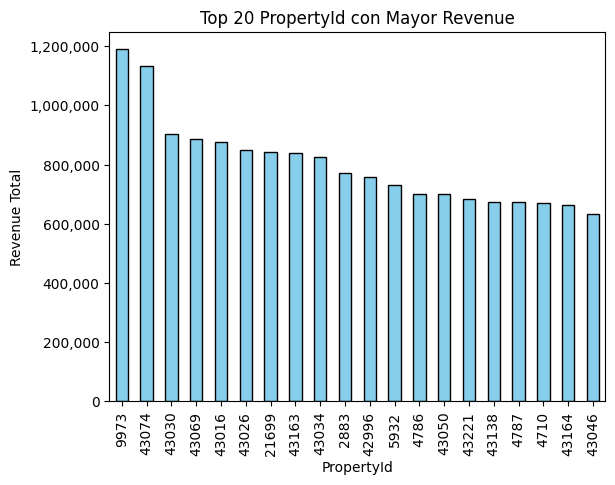

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

top_revenue = merged_df[['PropertyId', 'Revenue']].groupby('PropertyId').sum()
# Selecciona los 20 primeros
top_revenue = top_revenue.sort_values(by='Revenue', ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = top_revenue.plot(kind='bar', y='Revenue', legend=False, color='skyblue', edgecolor='black')

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xlabel('PropertyId')
plt.ylabel('Revenue Total')
plt.title('Top 20 PropertyId con Mayor Revenue')

plt.show()

<Figure size 1200x600 with 0 Axes>

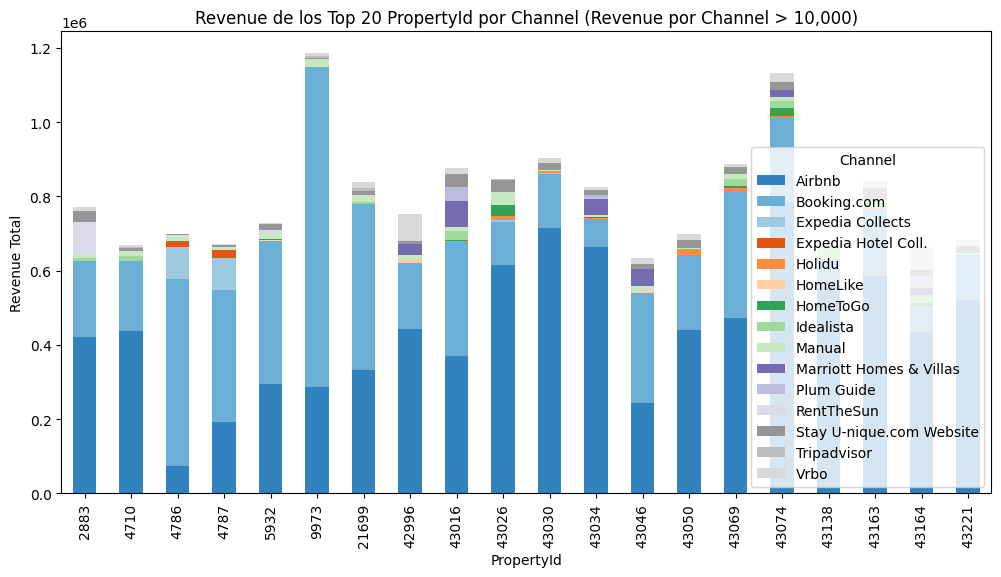

In [69]:
import matplotlib.pyplot as plt

top_revenue_ids = top_revenue.index

top_revenue_channels = merged_df[merged_df['PropertyId'].isin(top_revenue_ids)]

revenue_por_channel = top_revenue_channels.groupby(['PropertyId', 'Channel'])['Revenue'].sum().unstack()

# Filtro para incluir solo los Channels con Revenue mayor a 10000
revenue_por_channel = revenue_por_channel.loc[:, revenue_por_channel.sum() > 10000]

plt.figure(figsize=(12, 6))
revenue_por_channel.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.xlabel('PropertyId')
plt.ylabel('Revenue Total')
plt.title('Revenue de los Top 20 PropertyId por Channel (Revenue por Channel > 10,000)')

plt.legend(title='Channel')
plt.show()

<Figure size 1200x600 with 0 Axes>

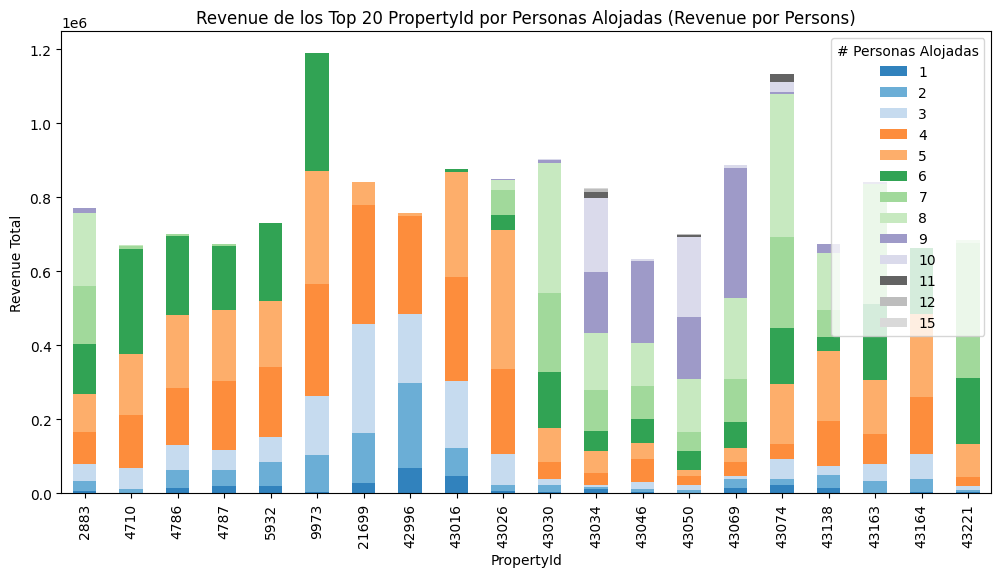

In [71]:
import matplotlib.pyplot as plt

top_revenue_ids = top_revenue.index

top_revenue_channels = merged_df[merged_df['PropertyId'].isin(top_revenue_ids)]

revenue_por_channel = top_revenue_channels.groupby(['PropertyId', 'Persons'])['Revenue'].sum().unstack()

plt.figure(figsize=(12, 6))
revenue_por_channel.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.xlabel('PropertyId')
plt.ylabel('Revenue Total')
plt.title('Revenue de los Top 20 PropertyId por Personas Alojadas (Revenue por Persons)')

plt.legend(title='# Personas Alojadas')
plt.show()